# 7 Practical: Confidence Intervals Solutions

In this practical you will

- Explore the effect of sample size on confidence intervals
- Explore how confidence intervals change when the level changes
- Obtain confidence intervals for a mean, a difference in means and (optional) a proportion
- (optional) Explore how to obtain bootstrap confidence intervals

We will use the mother and baby dataset.

## Confidence Intervals and Reference Ranges

**Question 1.** 

i.The code below draws a histogram of birthweight, showing a symmetric bell-shaped distribution. There is no missing data in the variable and no obvious outliers (min=55 ounces, max=176 ounces). The mean and standard deviation are: 119.46 ounces and 18.3 ounces.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   55.0   108.0   120.0   119.5   131.0   176.0 

[1] 0

[1] 119.4625

[1] 18.32867

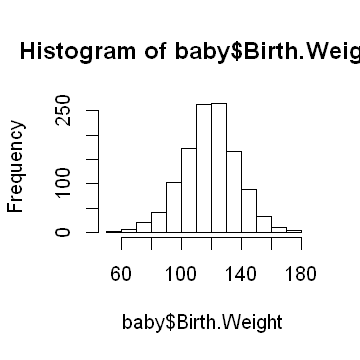

In [2]:
# Open mother-baby data
baby <- read.csv("baby.csv", sep=",")

# Explore birth weight
options(repr.plot.width=3, repr.plot.height=3)
hist(baby$Birth.Weight)

# Look at the variable
summary(baby$Birth.Weight)
sum(is.na(baby$Birth.Weight))

# Mean birthweight
mean(baby$Birth.Weight)

# Standard deviation
sqrt(var(baby$Birth.Weight))



ii. The reference range (using code below) runs from 83.5 ounces to 155.4 ounces. So we expect 95% of individual baby weights, in this population, to lie within the range: (83.5, 155.4).

In [3]:
# Reference range
mean(baby$Birth.Weight) - 1.96*sqrt(var(baby$Birth.Weight))
mean(baby$Birth.Weight) + 1.96*sqrt(var(baby$Birth.Weight))

[1] 83.53833

[1] 155.3867

iii. The standard error is $SE=\sigma/\sqrt{n}$, where $\sigma$ is the standard deviation of baby weights and $n$ is the sample size (n=1174 here). Plugging in the numbers, $SE = 18.3/\sqrt{1174} = 0.53$.  Alternatively, in R:

In [4]:
(se <- sqrt(var(baby$Birth.Weight))/sqrt(sum(!is.na(baby$Birth.Weight))))

[1] 0.53493

A 95% confidence interval for the population mean birthweight is obtained as:
$$
\mbox{Sample mean} \pm 1.96 \times SE(\mbox{mean})
$$
The code below calculates these two limits.

In [5]:
mean(baby$Birth.Weight) + 1.96*se
mean(baby$Birth.Weight) - 1.96*se

[1] 120.511

[1] 118.4141

As we will see towards the end of the session, the validity of this confidence requires a large-sample approximation, but this is fine because this is a large sample. 

The 95% confidence interval for the mean runs from 118.4 to 120.5 (ounces). 

The 95% reference range for baby weights runs from 83.5 to 155.4 (ounces).

Hopefully, it's clear that the 95% CI is much narrower. The confidence interval is a range of values which we believe are plausible values for the **mean**. So the fact that this is an interval at all, rather than just a point, reflects our lack of knowledge, our uncertainty, about this value. 

The reference range, however, reflects the inherent biological variability in individual baby weights. No matter how much we know, we can never narrow this range meaningfully. 

iv. The code below repeats in the subsample in which the mother smokes.

In [17]:
### Smaller sample (mother-baby pairs where the mother smokes)
babysmoke <-subset(baby, baby$Maternal.Smoker == "True")

mean(babysmoke$Birth.Weight)
sqrt(var(babysmoke$Birth.Weight))

# Reference range
mean(babysmoke$Birth.Weight) - 1.96*sqrt(var(babysmoke$Birth.Weight))
mean(babysmoke$Birth.Weight) + 1.96*sqrt(var(babysmoke$Birth.Weight))


### Estimated standard error
(se_sm <- sqrt(var(babysmoke$Birth.Weight))/sqrt(sum(!is.na(babysmoke$Birth.Weight))))

### 95% CI
mean(babysmoke$Birth.Weight) + 1.96*se_sm
mean(babysmoke$Birth.Weight) - 1.96*se_sm

 

[1] 113.8192

[1] 18.29501

[1] 77.96095

[1] 149.6774

[1] 0.853938

[1] 115.4929

[1] 112.1455

The table below compares all the statistics we have calculated between the full sample and the subsample in which the mother smokes. 

| Statistic |  Full sample  |  Smokers  |
| ---- | ---- | ---- |
| n | 1174 | 459 |
| Mean | 119.5 | 113.8 |
| SD | 18.3 | 18.3 |
| SE | 0.53 | 0.85 |
| 95% reference range | 83.5 to 155.4 | 78.0 to 149.7 |
| 95% confidence interval |  118.4 to 120.5 | 112.1 to 115.5 | 

The mean birth weight of babies born to smoking mothers is a little lower, which is in the direction we might expect. The standard deviation - the inherent variability in individual baby weights - is very similar in the two datasets. This is fairly typical - changing the sample size per se does not affect the standar deviation. This number would only change substantially if (a) we had a tiny sample in which it was hard to estimate the variability, or (b) the inherent variability really was different in this subset.The standard error, conversely, is very different. The standard error is $\sigma/\sqrt{n}$. We've seen that the denominators are basically the same, so this difference is purely due to the change in sample size. Larger sample sizes result in lower standard errors (more precision).

The reference range widths are similar, because the standard deviations are similar, and this determines the width of the interval. The range for the smokers is shifted a little to the left (lower numbers), because the sample mean is a little lower in smokers.

The confidence interval is narrower for the whole sample, because we have more precision (a larger sample). 

## Levels of confidence intervals

**Question 2.**  

i. The 95% confidence interval for the mean produced by the t.test function below is the same as the manual one we calculated above. Note that the output also displays the sample mean, which is the same as we found above.

In [21]:
t.test(baby$Birth.Weight, data=baby, conf.level = 0.95)


	One Sample t-test

data:  baby$Birth.Weight
t = 223.32, df = 1173, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 118.413 120.512
sample estimates:
mean of x 
 119.4625 


ii. The code below changes the level of the confidence interval.

In [14]:
t.test(baby$Birth.Weight, data=baby, conf.level = 0.99)
t.test(baby$Birth.Weight, data=baby, conf.level = 0.80)
t.test(baby$Birth.Weight, data=baby, conf.level = 0.999)


	One Sample t-test

data:  baby$Birth.Weight
t = 223.32, df = 1173, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
99 percent confidence interval:
 118.0824 120.8427
sample estimates:
mean of x 
 119.4625 



	One Sample t-test

data:  baby$Birth.Weight
t = 223.32, df = 1173, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
80 percent confidence interval:
 118.7766 120.1484
sample estimates:
mean of x 
 119.4625 



	One Sample t-test

data:  baby$Birth.Weight
t = 223.32, df = 1173, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
99.9 percent confidence interval:
 117.6979 121.2272
sample estimates:
mean of x 
 119.4625 


All of these intervals are centred around the same mean (119.5). The 95% CI is one which, under repeated sampling, would contain the true value $\mu$ 95% of the time. The 99.9% CI is one which, under repeated sampling, would contain the true value 99.9% of the time. So this interval needs to be much wider to ensure that higher coverage.


| Level | Confidence Interval  |
| ---- | ---- | 
| 80% |  118.8 to 120.1 | 
| 95% |  118.4 to 120.5  | 
| 99% |  118.1 to 120.8 | 
| 99.9% |  117.7 to 121.2  | 


# Exploring different confidence intervals

**Question 3.** 

i. The code below performs some summaries of the two groups - those with mothers who smoke and those with mothers who don't smoke. 

In [4]:
with(baby, table(Maternal.Smoker))

babysmoke <-subset(baby, baby$Maternal.Smoker == "True")
babynonsmoke <-subset(baby, baby$Maternal.Smoker == "False")

# Summarise birth weight by smoking group
summary(babysmoke$Birth.Weight)
summary(babynonsmoke$Birth.Weight)

mean(babysmoke$Birth.Weight)
mean(babynonsmoke$Birth.Weight)

sqrt(var(babysmoke$Birth.Weight))
sqrt(var(babynonsmoke$Birth.Weight))


Maternal.Smoker
False  True 
  715   459 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   58.0   101.0   115.0   113.8   126.0   163.0 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   55.0   113.0   123.0   123.1   134.0   176.0 

[1] 113.8192

[1] 123.0853

[1] 18.29501

[1] 17.4237

We see that the mean is a little lower among mothers who smoke, but that the standard deviations are quite similar.  Below, we calculate a 95% confidence interval for the difference in means.

In [23]:
# Difference in means
t.test(baby$Birth.Weight ~ baby$Maternal.Smoker, data=baby, conf.level = 0.95)

123.085314685315 - 113.81917211329



	Welch Two Sample t-test

data:  baby$Birth.Weight by baby$Maternal.Smoker
t = 8.6265, df = 941.81, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  7.158132 11.374153
sample estimates:
mean in group False  mean in group True 
           123.0853            113.8192 


[1] 9.266143

ii. The code below calculates an approximate large-sample 95% confidence interval for the proportion of mothers who smoke.

In [5]:
n<- length(baby$Birth.Weight)
(prop <- length(babysmoke$Birth.Weight)/n)
se_prop <- sqrt(prop*(1-prop)/n)

prop - 1.96*se_prop
prop + 1.96*se_prop

[1] 0.390971

[1] 0.3630576

[1] 0.4188845

We see that 39.1% of mothers smoke in this sample of data. The 95% confidence interval for the proportion runs from 36.3% to 41.8%. 

Below, a number of other confidence intervals for the proportion are calculated. 

In [19]:

binom.test(459, 1174,
           0.5,
           alternative="two.sided",
           conf.level=0.95)

prop.test(459, 1174, p = NULL,
          alternative = "two.sided",
          conf.level = 0.95, correct = TRUE)


prop.test(459, 1174, p = NULL,
          alternative = "two.sided",
          conf.level = 0.95, correct = FALSE)



	Exact binomial test

data:  459 and 1174
number of successes = 459, number of trials = 1174, p-value = 7.928e-14
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.3629351 0.4195547
sample estimates:
probability of success 
              0.390971 



	1-sample proportions test with continuity correction

data:  459 out of 1174, null probability 0.5
X-squared = 55.388, df = 1, p-value = 9.896e-14
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3630379 0.4196262
sample estimates:
       p 
0.390971 



	1-sample proportions test without continuity correction

data:  459 out of 1174, null probability 0.5
X-squared = 55.823, df = 1, p-value = 7.931e-14
alternative hypothesis: true p is not equal to 0.5
95 percent confidence interval:
 0.3634570 0.4191963
sample estimates:
       p 
0.390971 


The different CIs are shown below:


| Method | 95% Confidence Interval  |
| ---- | ---- | 
| Our large-sample |  36.3% to 41.8% | 
| Exact|  36.3% to 42.0%  | 
| Large sample with continuity correction |  36.3% to 42.0% | 
| Large sample without continuity correction |  36.3% to 42.0%  | 

Our rough-and-ready large-sample approximation is fractionally narrower than the other approaches. The other three are very similar. In this case, an exact approach is not necessary. A large-sample one approach sufficient. Our CI works on the proportion scale; many other approaches work on a transformed scale. So one of the large samples used by prop.test is probably the preferred option. In this case, the help file is very opaque about exactly which approach they are using, but it is Wilson's score method, which typically has better performance than our approximation.

iii. The boostrap 95% percentile CI runs from 118.5 to 120.5. Our 95% CI for the mean ran from 118.4 to 120.5. They are very similar. In this case, the assumptions required for both approaches appear to hold, so we would expect similar results. The bootstrap really comes into its own when we have a scenario where it is very complex to derive an analytic confidence interval, but we believe that the bootstrap principle holds, i.e. we typically use the bootstrap only when we can't obtain a valid analytic CI. 


[1] 119.4702

[1] 0.5041817

2.5%    97.5% 
118.4608 120.5010

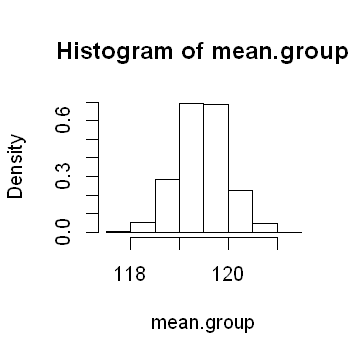

In [20]:
# Set the seed
set.seed(1234)

# Draw bootstrap samples
bootstrap <- lapply(1:1000, function(i) sample(baby$Birth.Weight, replace = T))

# Calculate sample means in each bootstrap sample
mean.group <- sapply(bootstrap, mean)

# Some summary statistics
mean(mean.group)
sqrt(var(mean.group))
                     
# Draw a histogram
hist(mean.group, freq=FALSE)

# Print out the 2.5th and 97.5th percentiles
quantile(mean.group, c(0.025, 0.975))